In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples =100, n_features = 2, n_informative = 1, n_redundant = 0, n_classes = 2,n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep =20)

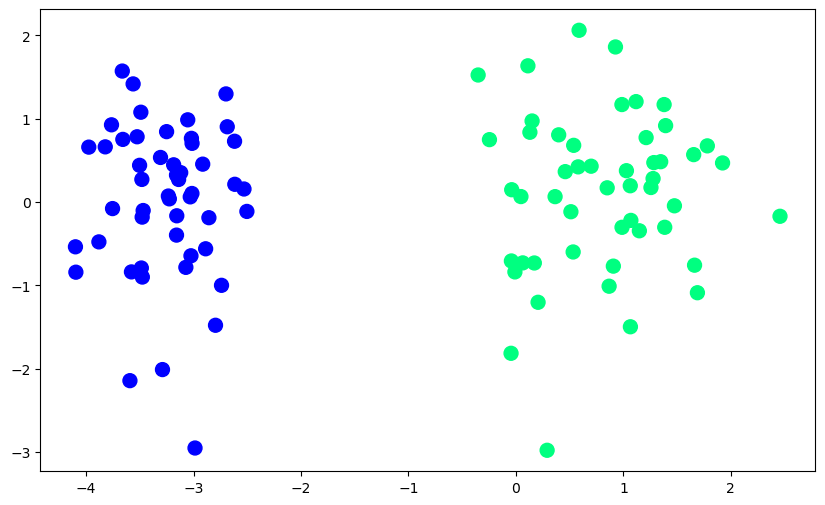

In [3]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'winter',s = 100 )

In [53]:
def gd(X_train, y_train):
    X_train = np.insert(X_train, 0, 1, axis = 1)
    weights = np.ones(X_train.shape[1])
    lr = 0.1
    
    for i in range(0,3000):
        y_hat = sigmoid(np.dot(X_train, weights))
        weights = weights + lr * (np.dot((y_train - y_hat), X_train)/X_train.shape[0])
        
    return weights[0], weights[1:]

In [54]:
intercept_, coef_ = gd(X, y)
print(intercept_, coef_)

3.7926187988645395 [3.45218231 0.11411771]


In [55]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b 

In [57]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
# lor = LogisticRegression(penalty = 'none', solver ='sag')
lor.fit(X,y)

LogisticRegression()

In [58]:
lor.coef_

array([[2.36687798, 0.02178765]])

In [59]:

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

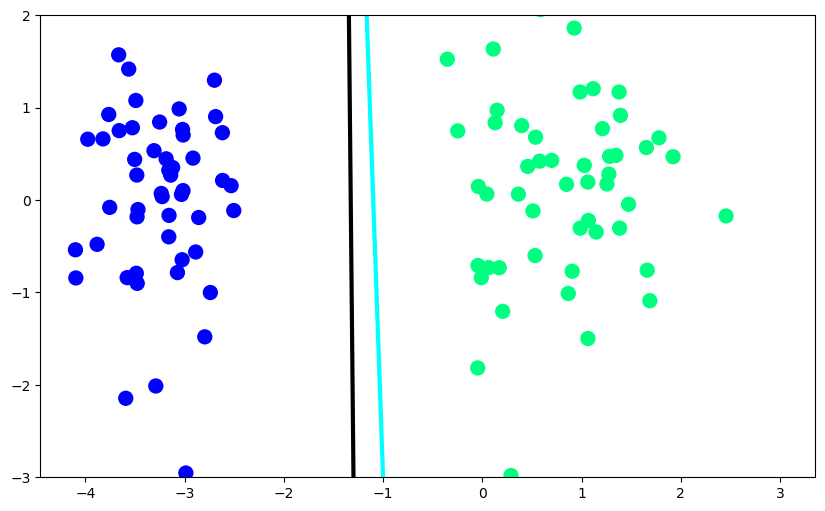

In [62]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='cyan',linewidth=3)
plt.plot(x_input2, y_input2, color = 'black', linewidth = 3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)